<a href="https://colab.research.google.com/github/AzadMehedi/AzadMehedi/blob/main/Plotting_using_Seaborn_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

In [2]:
# import datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

## Categorical Plots

### Categorical Scatter Plot

- Stripplot
- Swarmplot

### Categorical Distribution Plots

- Boxplot
- Violinplot

### Categorical Estimate Plot -> for central tendency

- Barplot
- Pointplot
- Countplot

### Figure level function -> `catplot`

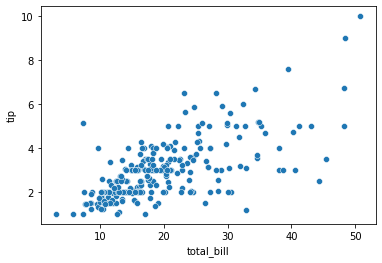

In [3]:
sns.scatterplot(data=tips, x='total_bill',y='tip')

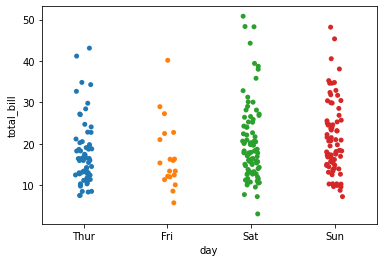

In [4]:
# strip plot   -  take one categorical and one numerical column and do scatterplot
# axes label
tips.head()
sns.stripplot(data=tips, x='day', y='total_bill')

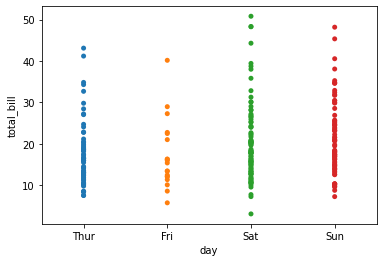

In [5]:
sns.stripplot(data=tips, x='day', y='total_bill', jitter=False)

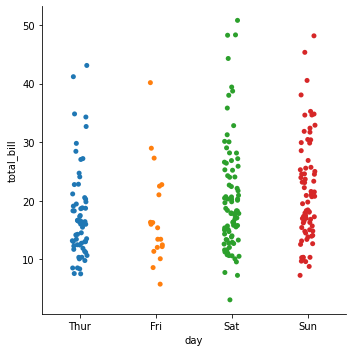

In [6]:
# figure label strip plot
# using catplot  

sns.catplot(data=tips, x='day', y='total_bill', kind='strip')


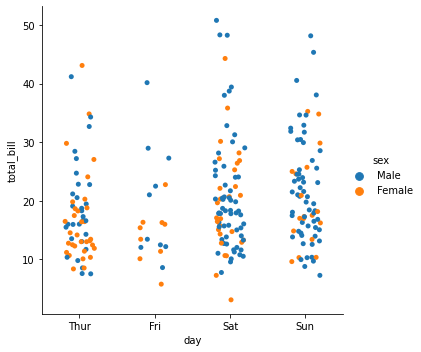

In [7]:
# jitter parameter
sns.catplot(data=tips, x='day', y='total_bill', kind='strip', jitter=0.2, hue='sex')

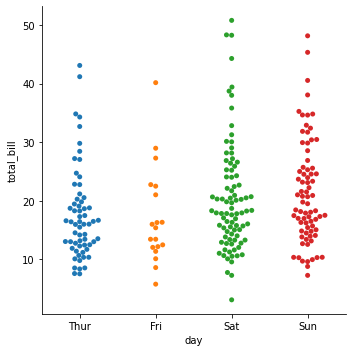

In [8]:
# swarmplot --- figure label
sns.catplot(data=tips, x='day', y='total_bill', kind='swarm')

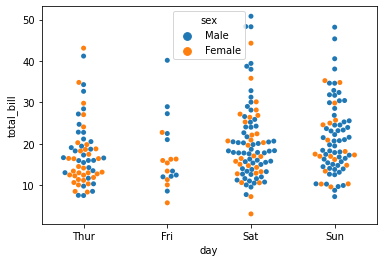

In [9]:
# swarmplot --- axes label
sns.swarmplot(data=tips, x='day', y='total_bill', hue='sex')

# Categorical Distribution Plots
### Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

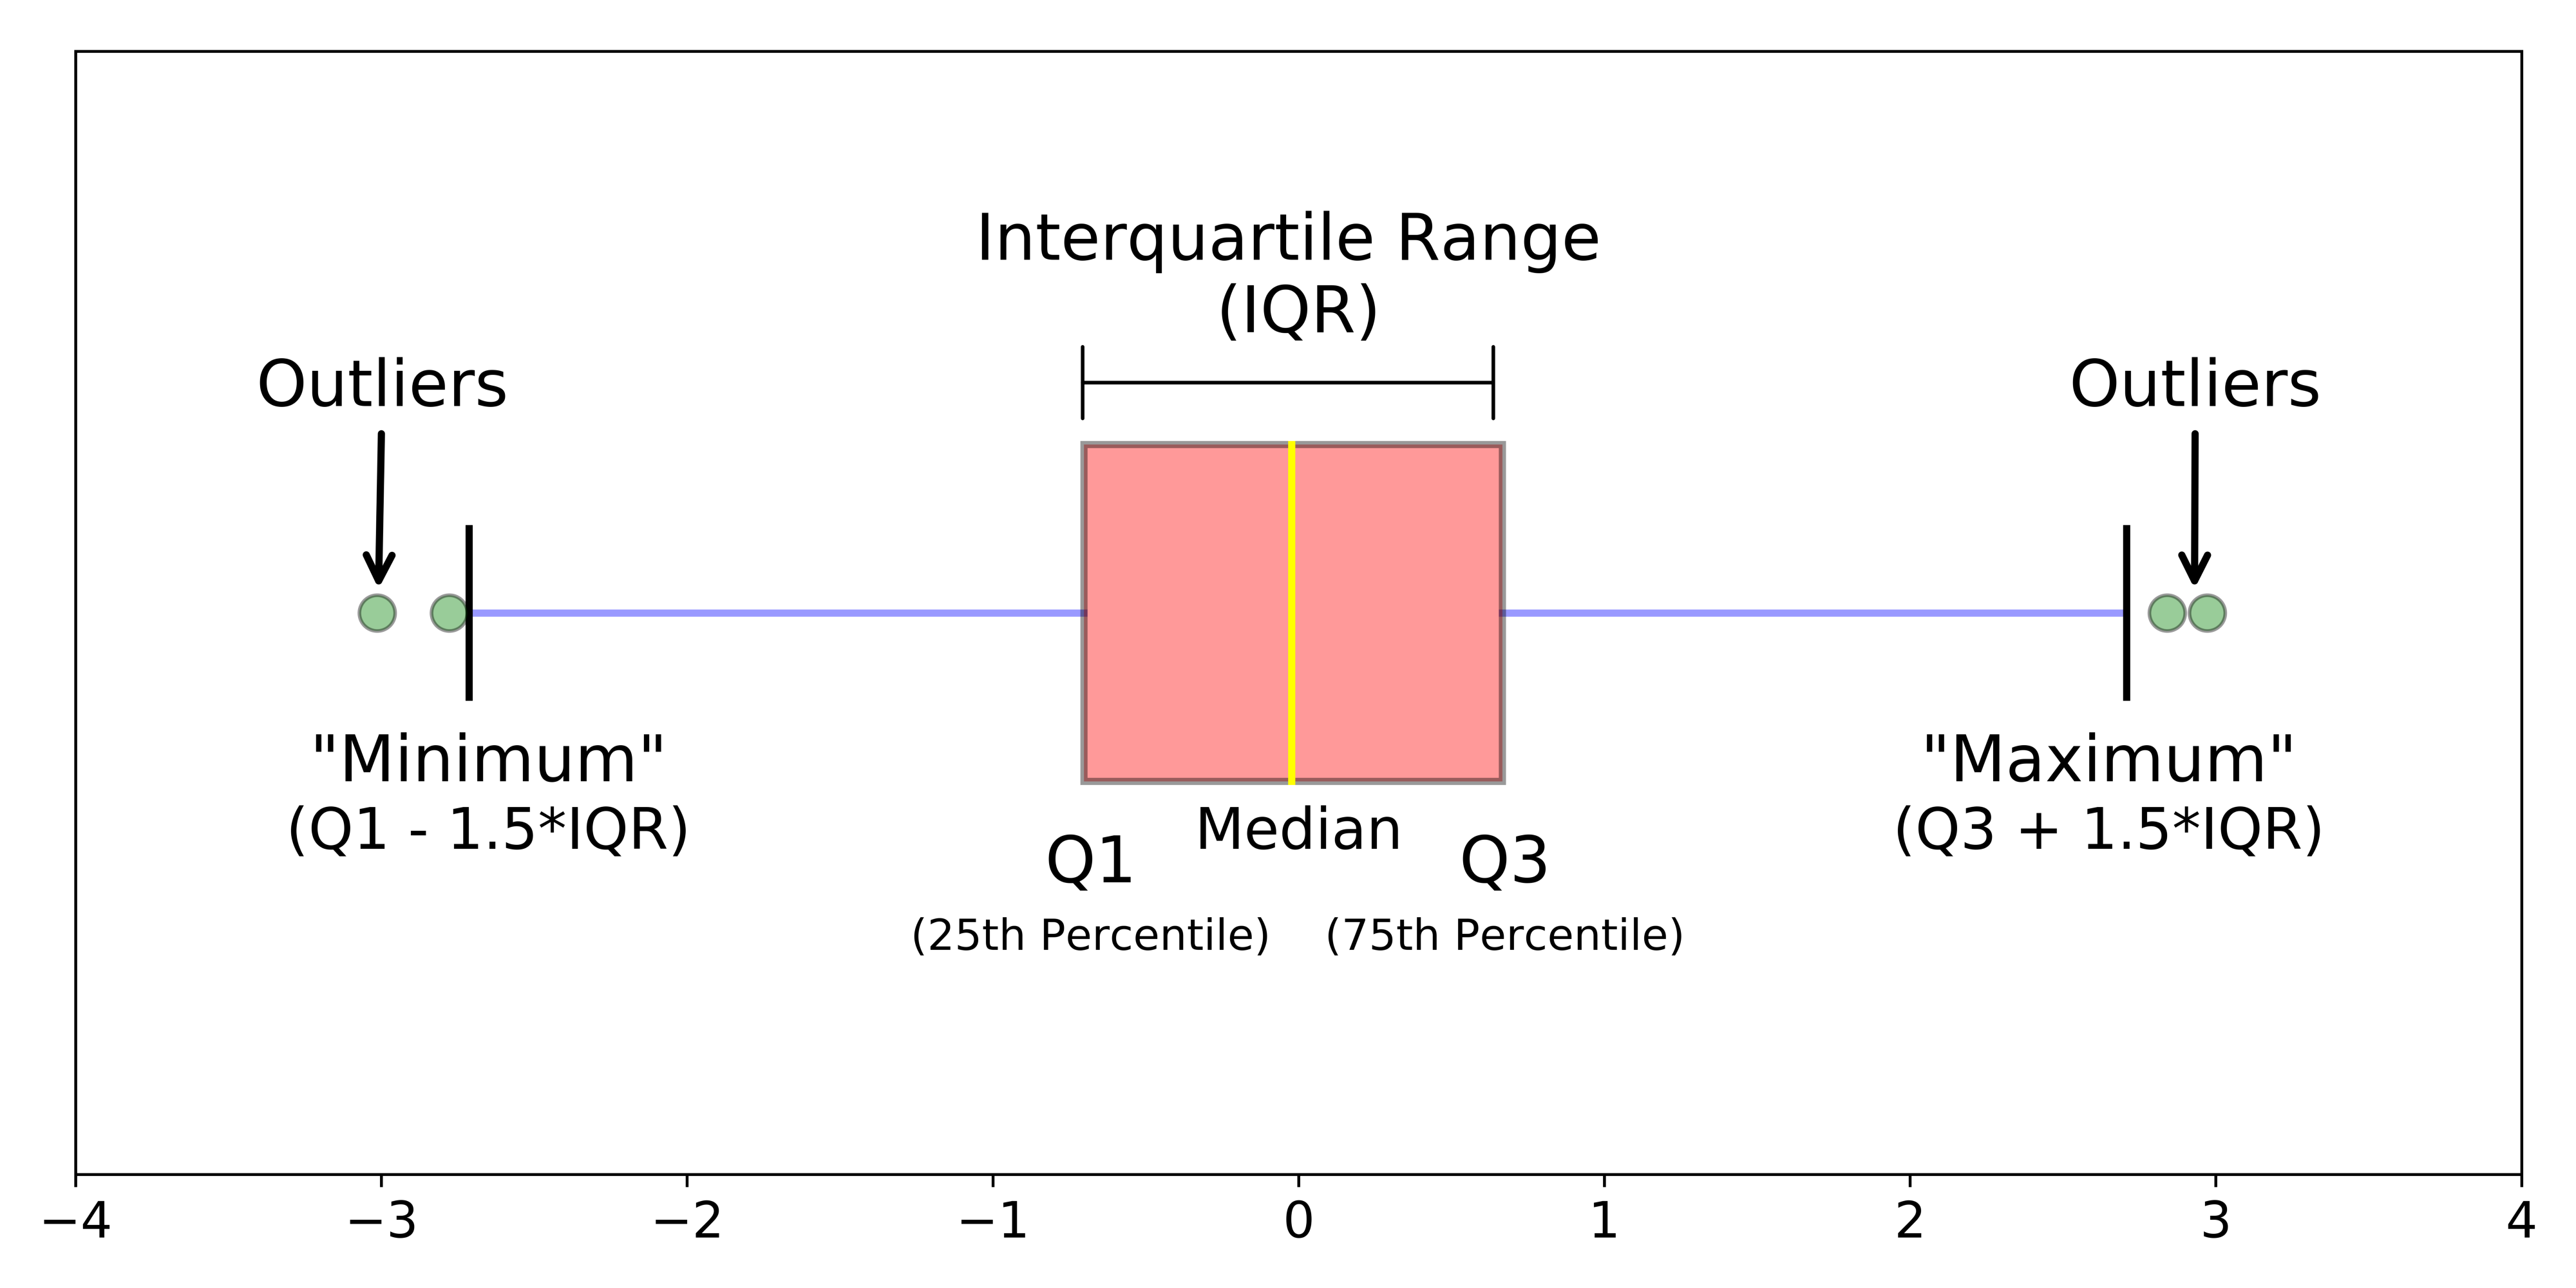

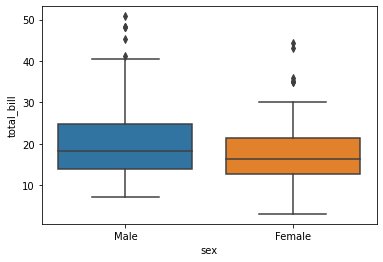

In [10]:
# Box plot
sns.boxplot(data=tips, x='sex', y='total_bill')

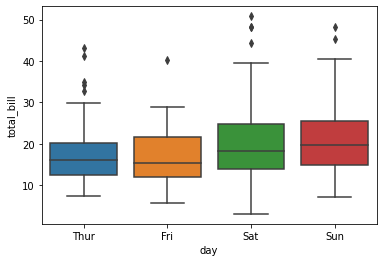

In [13]:
sns.boxplot(data=tips, x='day', y='total_bill')

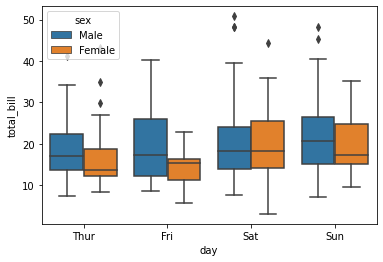

In [12]:
# with hue parameter
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')

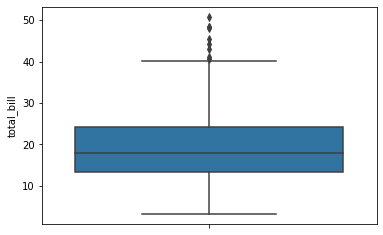

In [14]:
# single boxplot -> numerical col
sns.boxplot(data=tips, y='total_bill')

# Violinplot = (Boxplot + KDEplot)

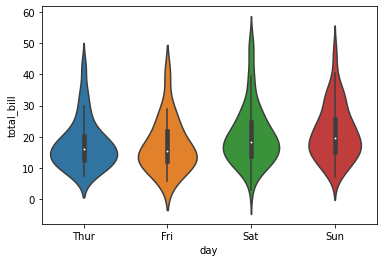

In [15]:
sns.violinplot(data=tips, x='day', y='total_bill')

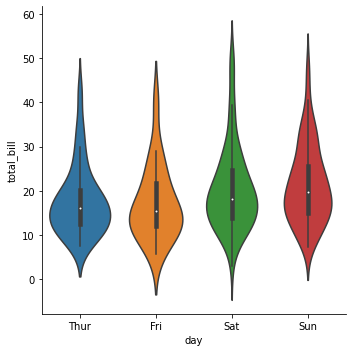

In [16]:
# axies label using catplot
sns.catplot(data=tips, x='day', y='total_bill',kind='violin')

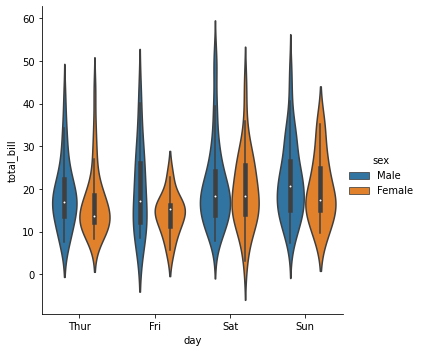

In [17]:
sns.catplot(data=tips, x='day', y='total_bill',kind='violin', hue='sex')

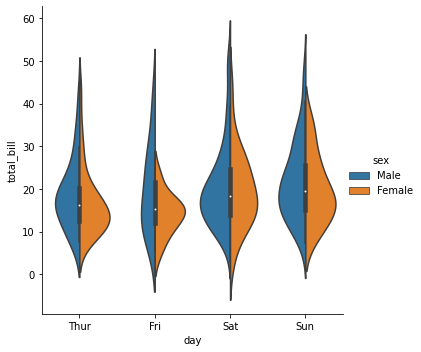

In [18]:
# side by side representation
sns.catplot(data=tips, x='day', y='total_bill',kind='violin', hue='sex', split=True)

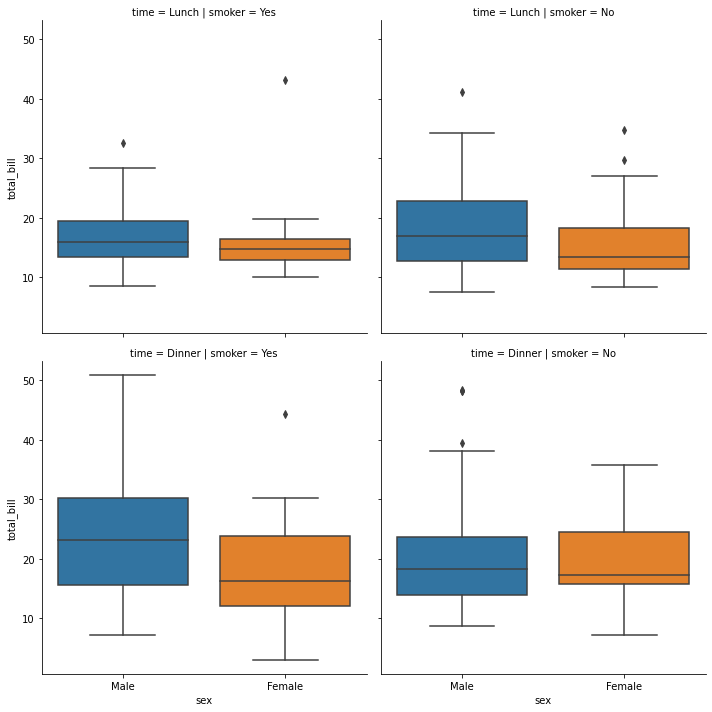

In [39]:
# faceting with using catplot
sns.catplot(data=tips, x='sex', y='total_bill', col='smoker', kind='box', row='time')

### Categorical Estimate Plot -> for central tendency
- Barplot
- Pointplot
- Countplot

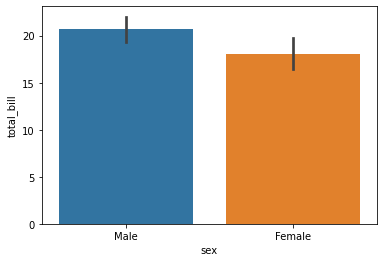

In [19]:
# barplot
sns.barplot(data=tips, x='sex',y='total_bill')

When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars

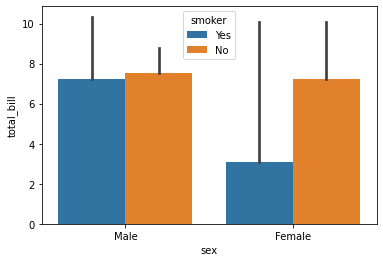

In [25]:
import numpy as np
sns.barplot(data=tips, x='sex',y='total_bill', hue='smoker', estimator=np.min)

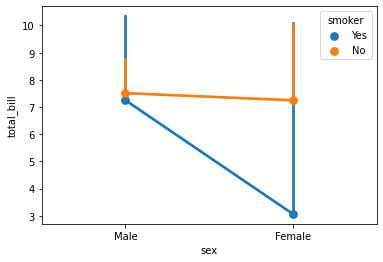

In [29]:
# pointplot   -> focus on comparison
sns.pointplot(data=tips, x='sex',y='total_bill', hue='smoker', estimator=np.min)

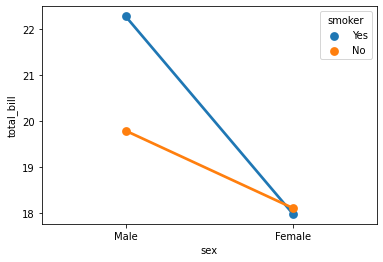

In [32]:
sns.pointplot(data=tips, x='sex', y='total_bill',hue='smoker',ci=None)   # removing error bar

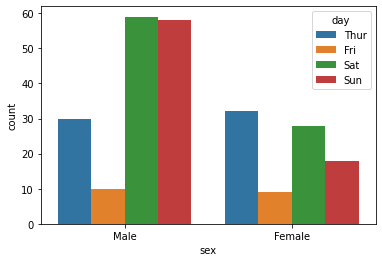

In [37]:
# countplot
sns.countplot(data=tips, x='sex', hue='day')

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable

### Regression Plots

- regplot   -> aixs label function
- lmplot    -> figure label

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

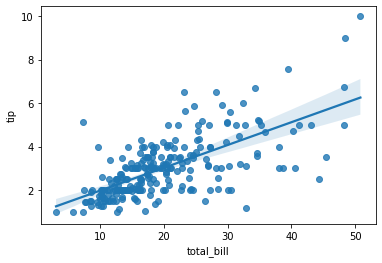

In [45]:
# regplot
# axis label
# hue parameter is ot available in regplot
sns.regplot(data=tips, x='total_bill', y='tip')

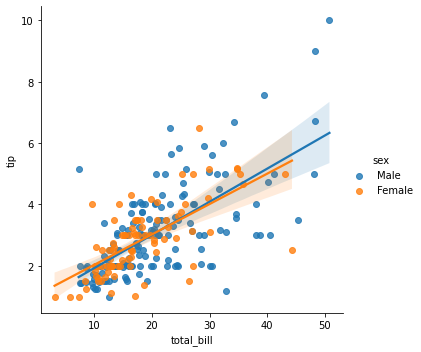

In [43]:
# lmplot
# figure label
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex')

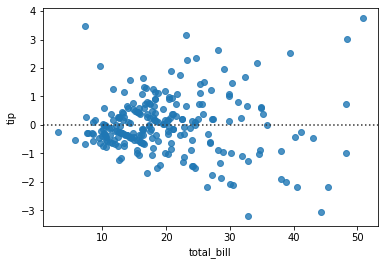

In [47]:
# residplot
sns.residplot(data=tips, x='total_bill', y='tip')

## A second way to plot Facet plots -> FacetGrid

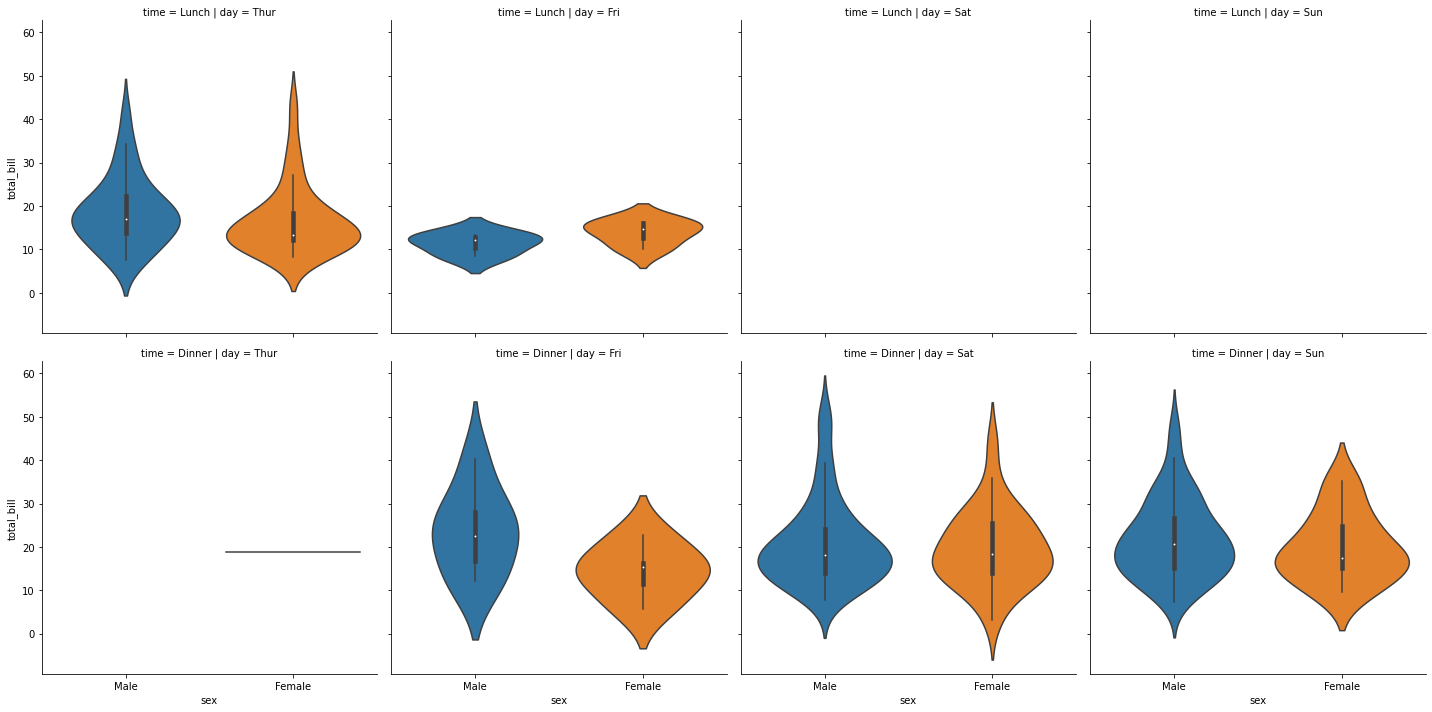

In [49]:
# figure level -> relplot -> displot -> catplot -> lmplot
sns.catplot(data=tips, x='sex', y='total_bill', kind='violin', col='day', row='time')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


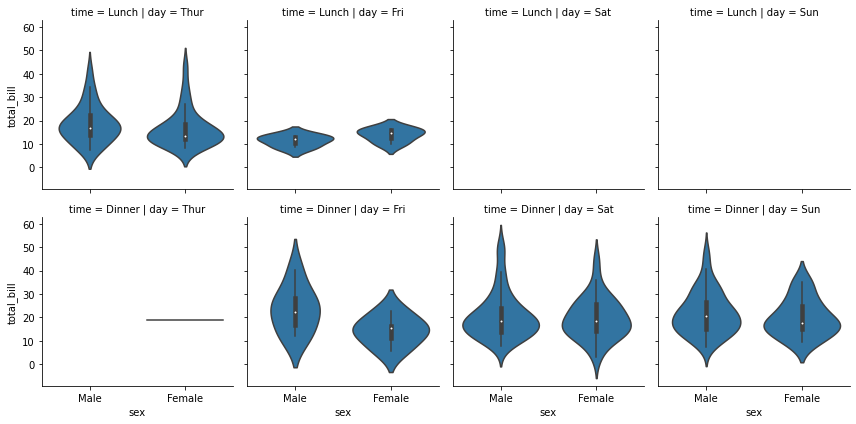

In [51]:
# FacetGrid
g = sns.FacetGrid(data=tips, col='day', row='time')
g.map(sns.violinplot, 'sex', 'total_bill')

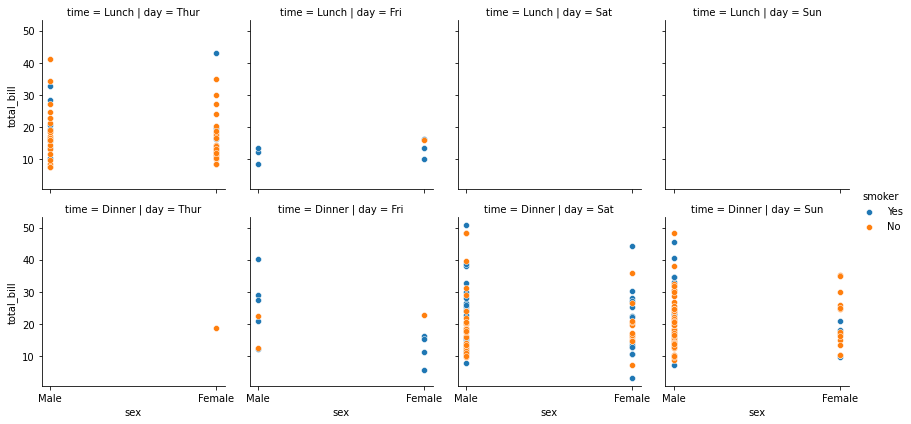

In [57]:
g = sns.FacetGrid(data=tips, col='day', row='time', hue='smoker')
g.map(sns.scatterplot, 'sex', 'total_bill')
g.add_legend()

## Plotting Pairwise Relationship (PairGrid Vs Pairplot)
- pairplot is special case of PairGrid. it will plot 'scatterplot' to all the non diagonal items and 'histogram or kde plot' to the diagonal items.
- bit there is no restriction in PairGrid

In [58]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


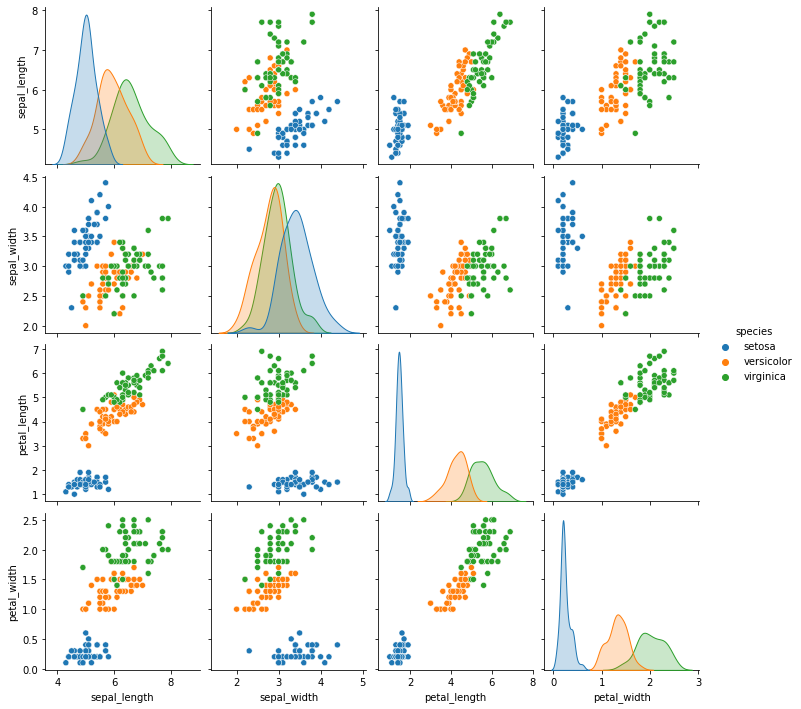

In [60]:
sns.pairplot(iris, hue='species')

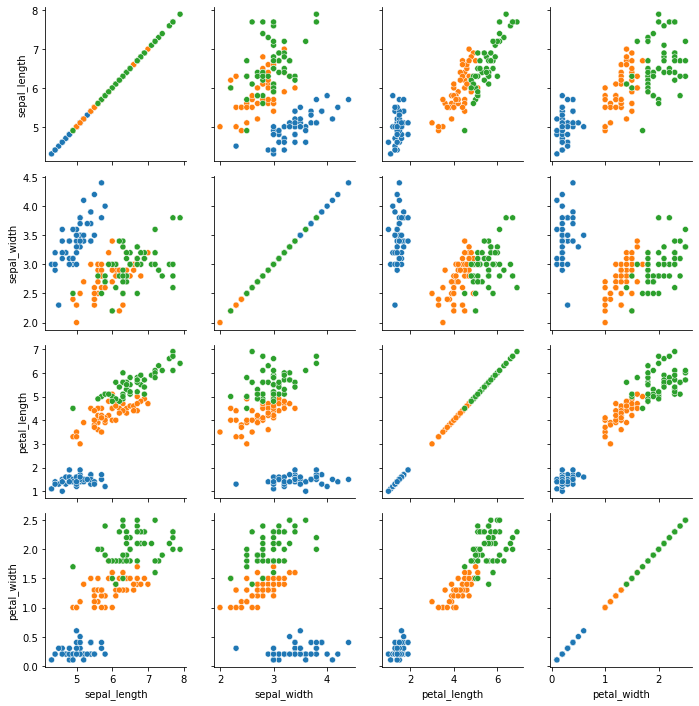

In [64]:
# pair gris
g = sns.PairGrid(data=iris, hue='species')
#g.map
g.map(sns.scatterplot)

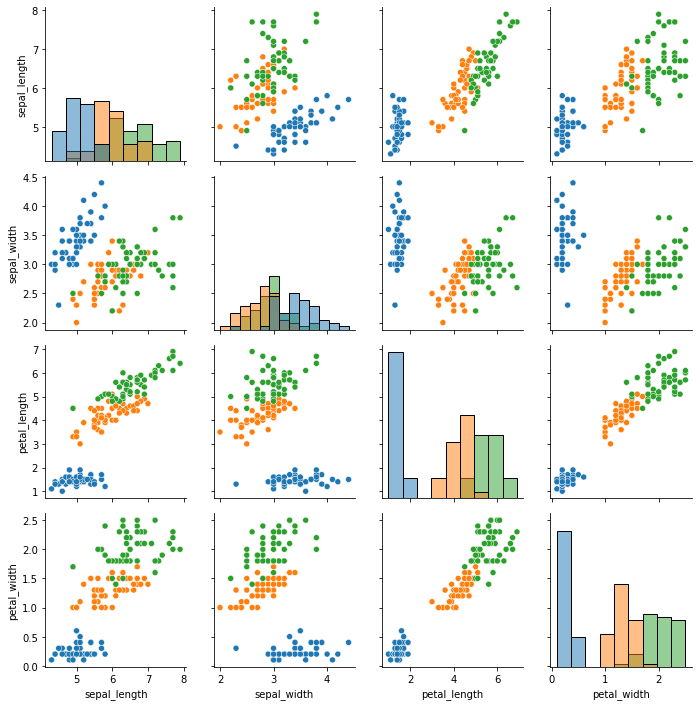

In [65]:
# map_diag -> map_offdiag
g = sns.PairGrid(data=iris, hue='species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

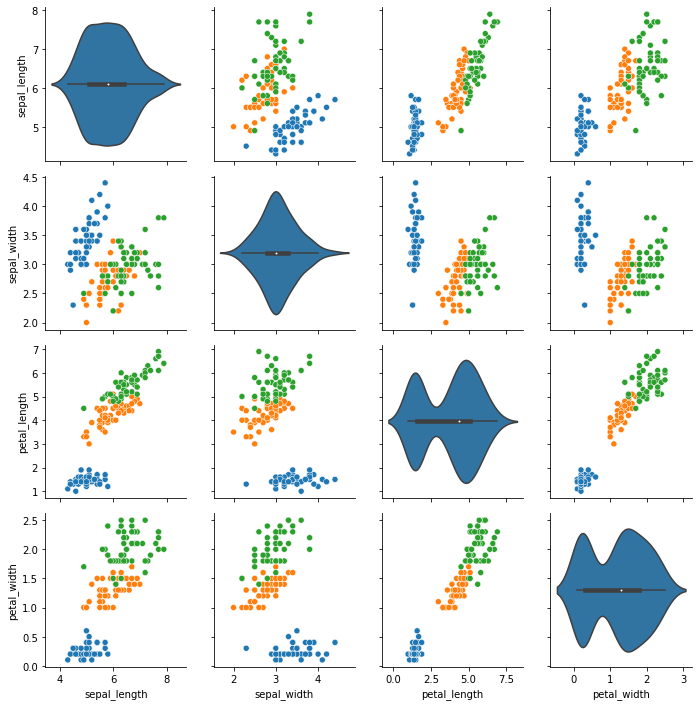

In [67]:
g = sns.PairGrid(data=iris, hue='species')
g.map_diag(sns.violinplot)
g.map_offdiag(sns.scatterplot)

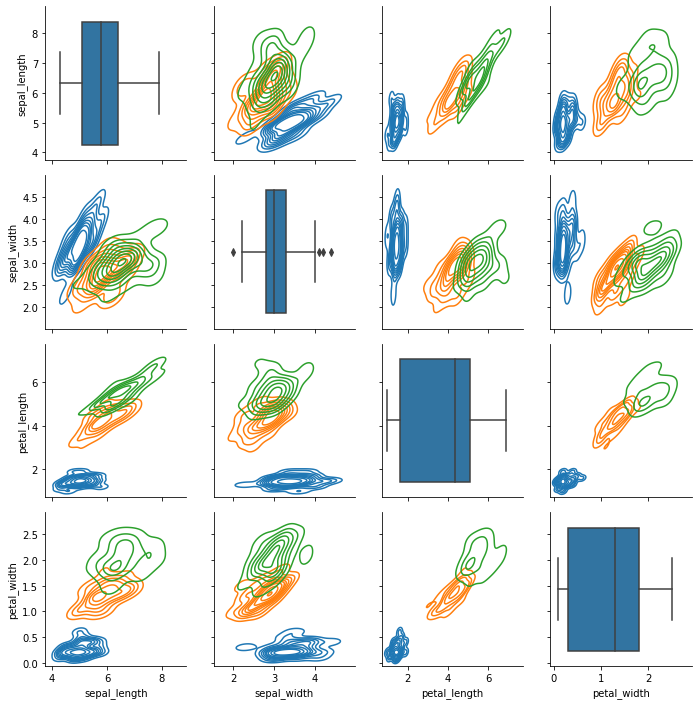

In [69]:
g = sns.PairGrid(data=iris, hue='species')
g.map_diag(sns.boxplot)
g.map_offdiag(sns.kdeplot)  

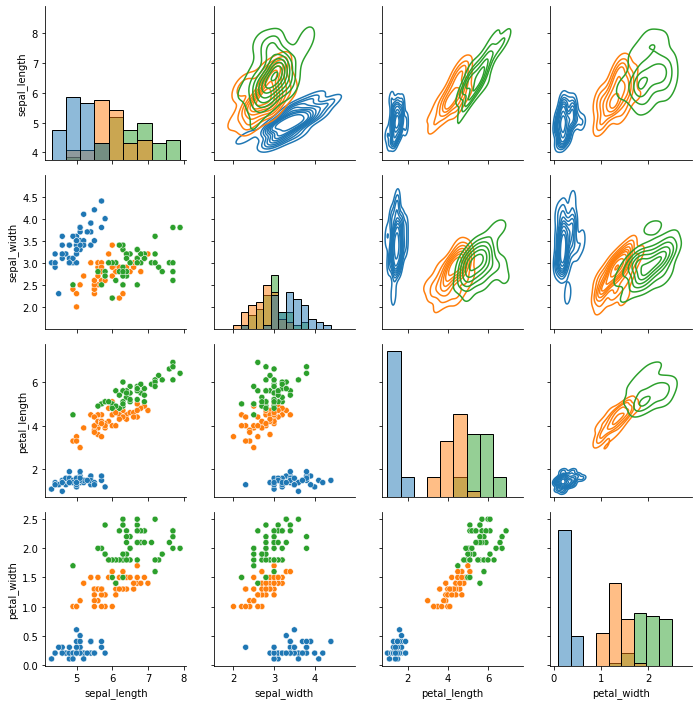

In [72]:
# map_diag -> map_upper -> map_lower
g = sns.PairGrid(data=iris,hue='species')
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)

# Jointgrid vs jointplot

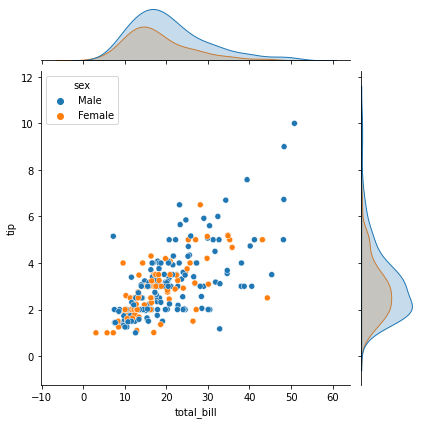

In [78]:
 # jointplot
sns.jointplot(data=tips, x='total_bill',y ='tip',kind='scatter', hue='sex')

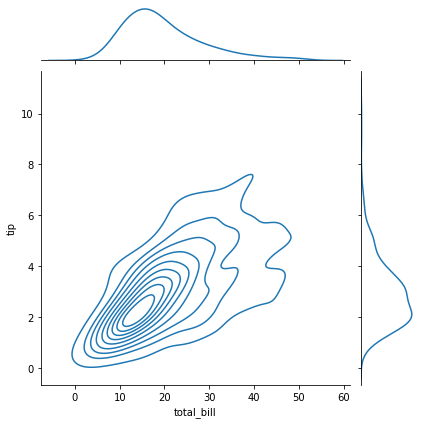

In [74]:
sns.jointplot(data=tips, x='total_bill',y ='tip',kind='kde')

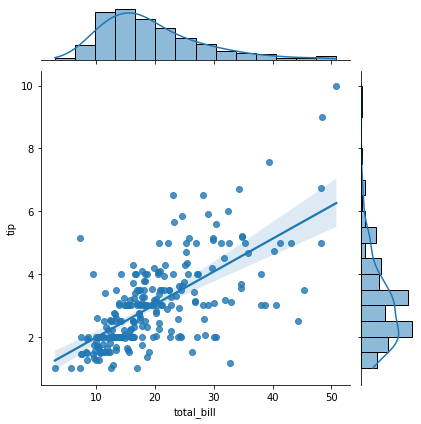

In [77]:
sns.jointplot(data=tips, x='total_bill',y ='tip',kind='reg')

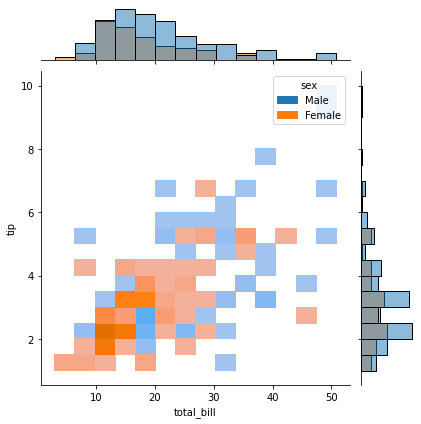

In [80]:
sns.jointplot(data=tips, x='total_bill',y ='tip',kind='hist', hue='sex', )

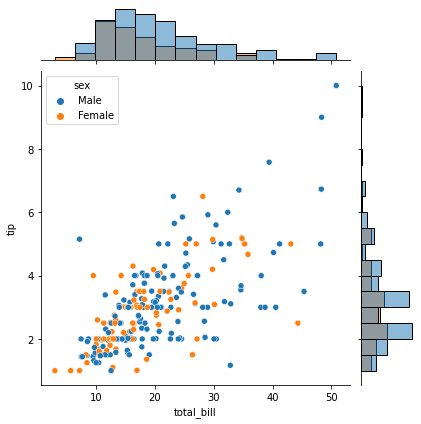

In [84]:
# JointGrid
s = sns.JointGrid(data=tips, x='total_bill', y='tip', hue='sex')
s.plot(sns.scatterplot, sns.histplot)

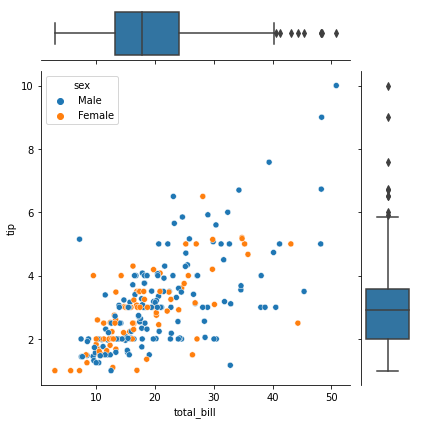

In [85]:
s = sns.JointGrid(data=tips, x='total_bill', y='tip', hue='sex')
s.plot(sns.scatterplot, sns.boxplot)

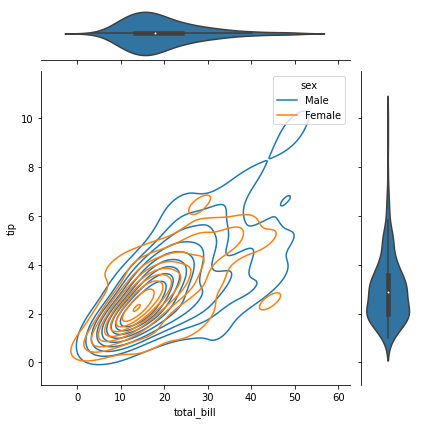

In [87]:
s = sns.JointGrid(data=tips, x='total_bill', y='tip', hue='sex')
s.plot(sns.kdeplot, sns.violinplot)

# Utility Functiom

In [90]:
# get dataset name
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [91]:
# load dataset
sns.load_dataset('flights')

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
